In [44]:
import skimage
import skimage.io

from skimage import feature
from skimage import color
from skimage import filters

from skimage.morphology import *

import numpy as np

import matplotlib.pyplot as plt

def show_image(img):
    """
    Show a single image
    """
    fig = plt.figure(figsize = (15,10))
    plt.imshow(img)

def save_image(img, name):
    skimage.io.imsave(name, img)

In [464]:
def otsu_image(image):
    gray = 1 - image
    threshold = filters.threshold_otsu(gray.reshape(-1, gray.shape[1], 1))

    return binary_dilation(gray > threshold)

In [416]:
img = "003"
image = skimage.io.imread(f"results/{img}/02_preprocessed.png")
exterior = skimage.io.imread(f"results/{img}/01_exterior.png")

In [417]:
def get_striped_house_candidates(exterior, binary):
    closed = binary_closing(binary, disk(3))
    closed = binary_opening(closed, disk(15))
    closed[exterior > 0] = False

    return remove_small_objects(closed, 1024)

In [418]:
binary = np.any(otsu_image(image), axis=2)
candidates = get_striped_house_candidates(exterior, binary)

In [419]:
gray = color.rgb2gray(image)
gray[candidates < 1] = 0

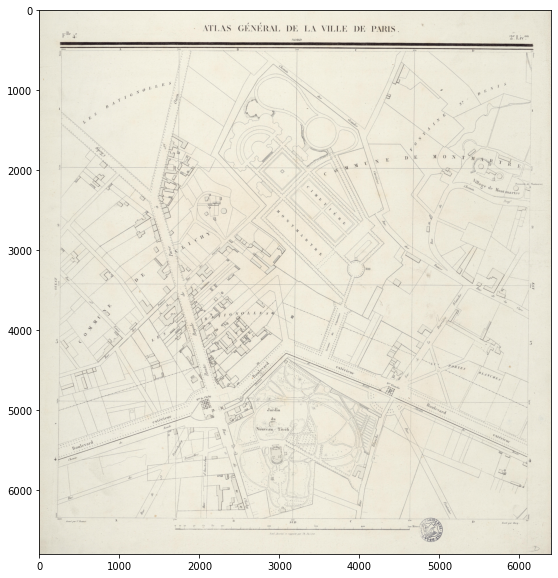

In [462]:
blurred = filters.gaussian(gray, sigma=2)
mask = remove_small_objects(blurred < 0.65, 10) | np.bitwise_not(candidates)

result = image.copy()
result[mask < 1,:] = np.mean(image.reshape(-1, 3), axis=0)

show_image(result)